In [1]:
import cv2
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
#% matplotlib notebook
% matplotlib inline

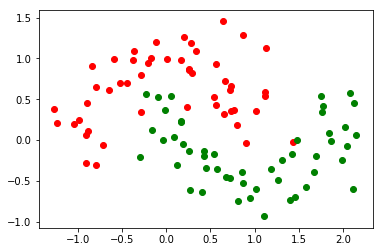

In [3]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=0)

nclusters = 2
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(X[(y == s),0],X[(y == s),1],marker='o', color=color[s])
#np.savetxt('moonclusterdata2.txt',X, delimiter=',')
#np.savetxt('moonclusterclasses2.txt',y, delimiter=',')

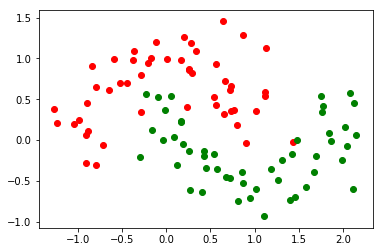

In [4]:
data = np.loadtxt('moonclusterdata2.txt', delimiter=',')
classes = np.loadtxt('moonclusterclasses2.txt', delimiter=',')

nclusters = 2
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(data[(classes == s),0],data[(classes == s),1],marker='o', color=color[s])

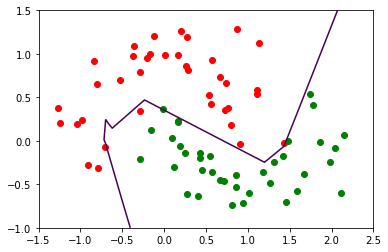

In [38]:
from sklearn.neural_network import MLPClassifier

data_train, data_test, classes_train, classes_test = sklearn.model_selection.train_test_split(data, classes, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(data_train, classes_train)
#activation='tanh'
X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 1000), np.linspace(-1.0, 1.5, 1000))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = mlp.predict_proba(X_grid)[:, 1]
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(data_train[(classes_train == s),0],data_train[(classes_train == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])

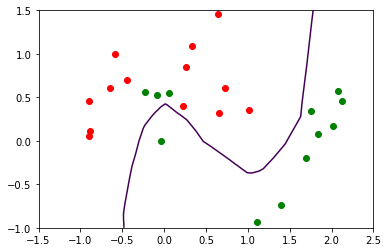

In [37]:
for s in range(nclusters):
    plt.scatter(data_test[(classes_test == s),0],data_test[(classes_test == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0.5])

In [50]:
mlp.score(data_train,classes_train)
mlp.score(data_test,classes_test)


0.88

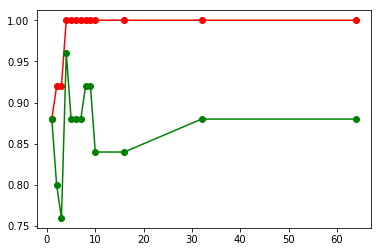

In [64]:
nunits = [1,2,3,4,5,6,7,8,9,10,16,32,64]
score_train=[]
score_test=[]
for s in nunits:
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[s], activation='tanh').fit(data_train, classes_train)
    score_train.append(mlp.score(data_train,classes_train))
    score_test.append(mlp.score(data_test,classes_test))
plt.plot(nunits,score_train,'ro-')
plt.plot(nunits,score_test,'go-')
    

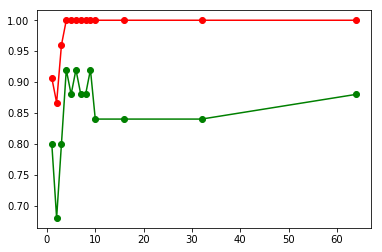

In [65]:
nunits = [1,2,3,4,5,6,7,8,9,10,16,32,64]
score_train=[]
score_test=[]
for s in nunits:
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[s,s], activation='tanh').fit(data_train, classes_train)
    score_train.append(mlp.score(data_train,classes_train))
    score_test.append(mlp.score(data_test,classes_test))
plt.plot(nunits,score_train,'ro-')
plt.plot(nunits,score_test,'go-')